# 線形回帰の解釈

In [1]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sma
from sklearn.preprocessing import StandardScaler

## t検定

In [2]:
# データのロード
df = pd.read_csv('data/sample_data2.csv')

y_col = 'rent'
X = df.drop(columns = [y_col])
y = df[y_col]

In [3]:
X

,space,age
0,20,3
1,25,13
2,28,18
3,30,10
4,36,6
5,51,1
6,55,5
7,62,2
8,83,5
9,103,23


In [4]:
y

0    13.958824
1    11.533805
2    14.269547
3    18.722680
4    19.602674
5    16.068166
6    23.183599
7    22.212595
8    29.357010
9    37.565129
Name: rent, dtype: float64

In [5]:
# バイアス項追加
X = sma.add_constant(X)
# 検定用の引数からインスタンス化
est = sma.OLS(y, X)
est_trained = est.fit()

# バイアス項のp値は気にしないのが一般的
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           0.000282
Time:                        12:49:29   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


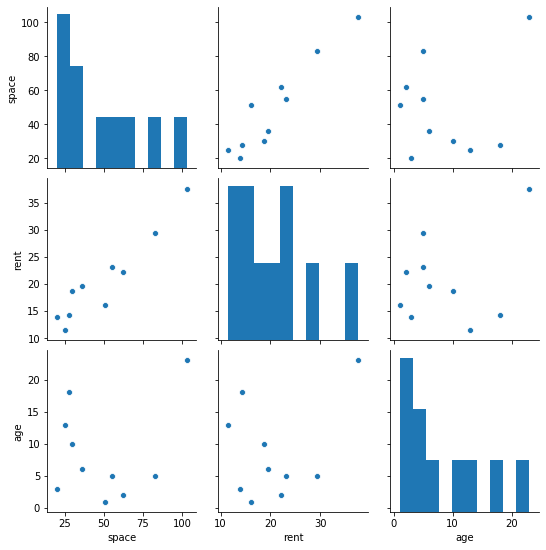

In [6]:
# 特徴量同士の散布図より、ageとrentが無相関である
# 実際はageの影響も考えられるが、
# データ数が少ないため影響がなく見える
sns.pairplot(df)

## t検定（標準化ver）

In [11]:
# データのロード
df = pd.read_csv('data/sample_data2.csv')
X = df.drop(columns = [y_col])
y = df[y_col]

In [12]:
# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# fit_transformでまとめられる
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# バイアス項追加
X_scaled = sma.add_constant(X_scaled)

est = sma.OLS(y, X_scaled)
est_trained = est.fit()

# 標準化の有無でp値（目的変数への影響）は変わらない
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           0.000282
Time:                        12:52:20   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [13]:
X_scaled

array([[ 1.        , -1.13466215, -0.8062772 ],
       [ 1.        , -0.9410338 ,  0.63350351],
       [ 1.        , -0.82485679,  1.35339387],
       [ 1.        , -0.74740544,  0.2015693 ],
       [ 1.        , -0.51505142, -0.37434298],
       [ 1.        ,  0.06583364, -1.09423334],
       [ 1.        ,  0.22073632, -0.51832106],
       [ 1.        ,  0.49181602, -0.95025527],
       [ 1.        ,  1.3050551 , -0.51832106],
       [ 1.        ,  2.07956852,  2.07328422]])